In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from datetime import datetime

from grid_tools import (generate_grid, plot_hot, random_grid_point, get_neighbors, 
                        count_identical_neighbors, count_total_energy, 
                        calculate_boltzmann_probability, phase_separate)

%matplotlib inline

### Generate grid sample

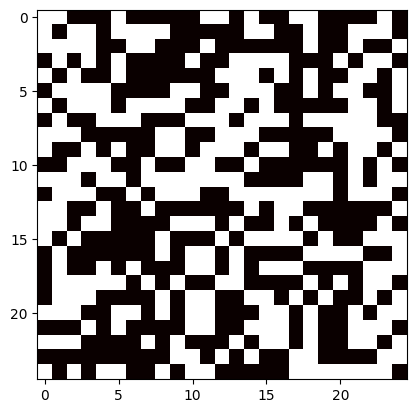

In [5]:
#parameters to create grid
rows = 25
cols = 25
percentage = 50
seed = 618

#generate grid
grid = generate_grid(rows, cols, percentage, seed)

#visualize
plot_hot(grid)

### Save sample grid

In [6]:
np.save(f'../data/grid_sample/grid_{str(seed)}',grid)

### Testing the number of iterations

Perform phase separation simulation on sample grid with varying numbers
of iterations in the simulation. 

The number of iterations considered were $10^n$, where $n=1,2,3,4,5$.

Five simulations are performed for each number of iteration considered. 

#### !!!BE AWARE THAT THIS CODE CELL WILL TAKE TIME TO RUN!!!

A CSV file with information about each simulation, and the grid that results from phase separation
will be saved in a folder `../data/`

In [7]:
n_iterations = np.logspace(1,5,5)

for i in range(5):
    
    for n_iter in n_iterations:
    
        separated_grid = grid.copy()
        separated_grid, energy, data_iter = phase_separate(separated_grid, iterations=int(n_iter))
        
        np.save(f'../data/separated_grids/separated_grid_{str(seed)}_iter_test_{int(n_iter)}_run_{i}',
                separated_grid)
        
        data_iter.index.name = "iteration"
        data_iter.to_csv(f'../data/simulation_data/data_separated_grid_{str(seed)}_iter_test_{int(n_iter)}_run_{i}.csv')
        
        current_time = datetime.now().time().strftime("%H:%M:%S")
        
        print('Completed: ', f'Iteration test: {int(n_iter)}', f'Run: {i}')
        print(f'Time: {current_time}')

Completed:  Iteration test: 10 Run: 0
Time: 17:17:22
Completed:  Iteration test: 100 Run: 0
Time: 17:17:22
Completed:  Iteration test: 1000 Run: 0
Time: 17:17:24
Completed:  Iteration test: 10000 Run: 0
Time: 17:17:40
Completed:  Iteration test: 100000 Run: 0
Time: 17:20:23
Completed:  Iteration test: 10 Run: 1
Time: 17:20:23
Completed:  Iteration test: 100 Run: 1
Time: 17:20:24
Completed:  Iteration test: 1000 Run: 1
Time: 17:20:25
Completed:  Iteration test: 10000 Run: 1
Time: 17:20:42
Completed:  Iteration test: 100000 Run: 1
Time: 17:23:25
Completed:  Iteration test: 10 Run: 2
Time: 17:23:25
Completed:  Iteration test: 100 Run: 2
Time: 17:23:25
Completed:  Iteration test: 1000 Run: 2
Time: 17:23:27
Completed:  Iteration test: 10000 Run: 2
Time: 17:23:43
Completed:  Iteration test: 100000 Run: 2
Time: 17:26:24
Completed:  Iteration test: 10 Run: 3
Time: 17:26:24
Completed:  Iteration test: 100 Run: 3
Time: 17:26:24
Completed:  Iteration test: 1000 Run: 3
Time: 17:26:26
Completed:  I

### Testing the temperature effects 

Perform phase separation simulation on sample grid with varying values of temperature to include in Boltzmann probability calculation. 

The temperatures considered were $10,20,30,40,50,60,70,80,90,100$ (units of Kelvin).

Five simulations are performed for each number of iteration considered. 

The number of iterations for each simulation was held constant at $10^4$.

#### !!!BE AWARE THAT THIS CODE CELL WILL TAKE TIME TO RUN!!!

A CSV file with information about each simulation, and the grid that results from phase separation
will be saved in a folder `../data/`

In [8]:
temperatures = np.linspace(100,10,10)

for i in range(5):

    for temperature in temperatures:
    
        separated_grid = grid.copy()
        separated_grid, energy, data_temp = phase_separate(separated_grid,temperature,iterations=10000)
    
        np.save(f'../data/separated_grids/separated_grid_{str(seed)}_temp_test_{str(int(temperature)).zfill(3)}_run_{i}',
                separated_grid)
        
        data_temp.index.name = "iteration"
        data_temp.to_csv(f'../data/simulation_data/data_separated_grid_{str(seed)}_temp_test_{str(int(temperature)).zfill(3)}_run_{i}.csv')
        
        current_time = datetime.now().time().strftime("%H:%M:%S")
        
        print('Completed: ', f'Temperature test: {str(int(temperature)).zfill(3)}', f'Run: {i}')
        print(f'Time: {current_time}')

Completed:  Temperature test: 100 Run: 0
Time: 17:32:45
Completed:  Temperature test: 090 Run: 0
Time: 17:33:02
Completed:  Temperature test: 080 Run: 0
Time: 17:33:18
Completed:  Temperature test: 070 Run: 0
Time: 17:33:35
Completed:  Temperature test: 060 Run: 0
Time: 17:33:52
Completed:  Temperature test: 050 Run: 0
Time: 17:34:09
Completed:  Temperature test: 040 Run: 0
Time: 17:34:25
Completed:  Temperature test: 030 Run: 0
Time: 17:34:42
Completed:  Temperature test: 020 Run: 0
Time: 17:34:59
Completed:  Temperature test: 010 Run: 0
Time: 17:35:16
Completed:  Temperature test: 100 Run: 1
Time: 17:35:32
Completed:  Temperature test: 090 Run: 1
Time: 17:35:49
Completed:  Temperature test: 080 Run: 1
Time: 17:36:06
Completed:  Temperature test: 070 Run: 1
Time: 17:36:22
Completed:  Temperature test: 060 Run: 1
Time: 17:36:39
Completed:  Temperature test: 050 Run: 1
Time: 17:36:56
Completed:  Temperature test: 040 Run: 1
Time: 17:37:12
Completed:  Temperature test: 030 Run: 1
Time: 1